Python 3.10.4

NumPy 1.23.1 / plt 3.5.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Plot

In [2]:
def plotting(x, u1, u2):
    fig = plt.figure()
    plt.figure(figsize=(10, 10))
    
    plt.subplot(1, 2, 1)
    plt.plot(x, u1, c='C1', label='Numerical Solution', linestyle='--', linewidth=2);
    plt.plot(x, exact_sol(1, x), c='C2', label='Exact Solution');
    plt.title("T=1")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x, u2, c='C1', label='Numerical Solution', linestyle='--', linewidth=2);
    plt.plot(x, exact_sol(2, x), c='C2', label='Exact solution');
    plt.title("T=2")
    plt.legend()
    
    plt.show()

# Exact Solution
$$ u(t, x) = cos(\pi(x-t))$$ 
for $\|x-t\| \leq \frac{1}{2} $ otherwise 0

In [3]:
def exact_sol(t, x):
    sol = np.cos(np.pi*(x-t)) ** 2
    sol[np.abs(x-t) > 1/2] = 0
    return sol


In [4]:
def initial_cond(x):
    y = np.cos(np.pi*x) ** 2
    y[np.abs(x)> (1/2)] = 0
    return y

# Define Mesh

In [5]:
def mesh(h, lamb):
    k = lamb * h
    x = np.arange(-3, 3, h)
    x = np.append(x,np.array([3]))
    initial = initial_cond(x)
    initial[np.abs(x) > 1/2] = 0
 
    t = np.arange(0, 2, k)
    t = np.append(t, np.array([2]))
    
    u = np.zeros((len(x), len(t)))
    u[:,0] = initial
    return u, x, len(t)
    
    

# Define the FDM Scheme

## Forward-time Forward-space
$$ \frac{v_{m}^{n+1} - v_{m}^{n}}{k} + a \frac{v_{m+1}^{n} - v_{m}^{n}}{h} = 0$$
$$v_{m}^{n+1} =  - \lambda v_{m+1}^{n} + (1+\lambda)v_{m}^{n}$$

In [6]:
def FTFS(h, lamb):
    u, x, lent = mesh(h, lamb)
    for i in range(0,lent-1):
        u[0:-1, i+1] = u[0:-1, i] - lamb * (u[1:,i] - u[0:-1, i])
        
    return u[:, -1], u[:, int(lent/2)], x

<Figure size 640x480 with 0 Axes>

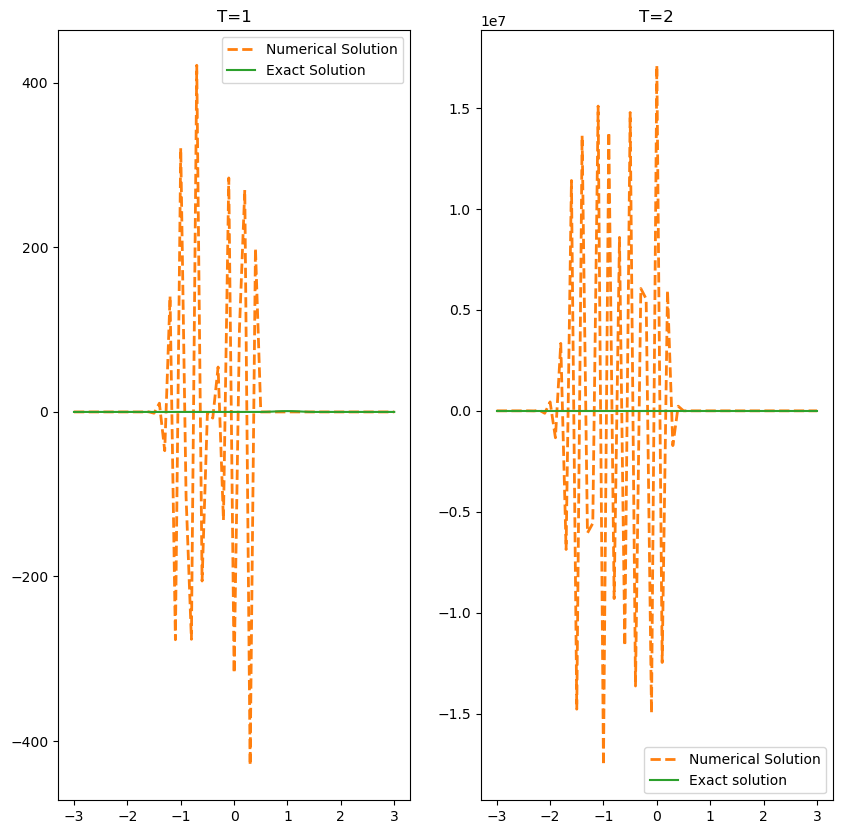

In [7]:
u2, u1, x= FTFS(1/10, 0.8)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

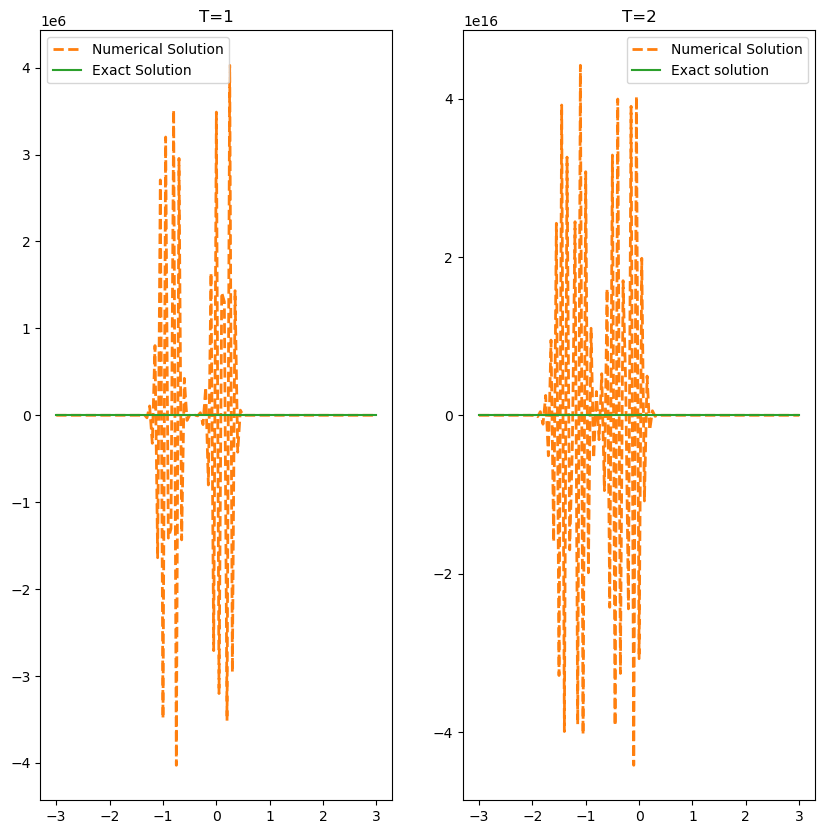

In [8]:
u2, u1, x= FTFS(1/20, 0.8)
plotting(x, u1, u2)

C:\Users\good\AppData\Local\Temp\ipykernel_1352\3746791631.py:4: RuntimeWarning: overflow encountered in subtract
  u[0:-1, i+1] = u[0:-1, i] - lamb * (u[1:,i] - u[0:-1, i])
C:\Users\good\AppData\Local\Temp\ipykernel_1352\3746791631.py:4: RuntimeWarning: invalid value encountered in subtract
  u[0:-1, i+1] = u[0:-1, i] - lamb * (u[1:,i] - u[0:-1, i])


<Figure size 640x480 with 0 Axes>

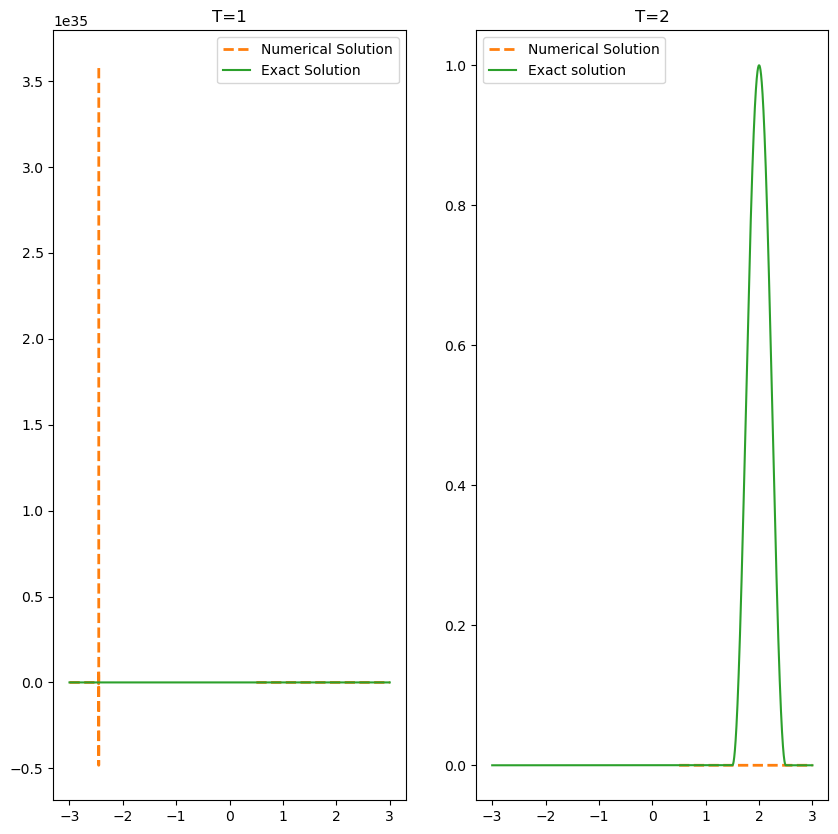

In [9]:
u2, u1, x= FTFS(1/1000, 1/3)
plotting(x, u1, u2)

## Forwad-time backward-space

$$ \frac{v_{m}^{n+1} - v_{m}^{n}}{k} + a\frac{v_{m}^{n} - v_{m-1}^{n}}{h} = 0$$
&harr; $v_{m}^{n+1} = (1 - \lambda)v_{m}^{n} + \lambda v_{m-1}^{n} $

In [10]:
def FTBS(h, lamb):
    u, x, lent = mesh(h, lamb)
    for i in range(0,lent-1):
        u[1:len(x), i+1] = (1 -lamb )* u[1:len(x), i] +  lamb * u[0:len(x)-1, i]
    return u[:, -1], u[:, int(lent/2)], x

<Figure size 640x480 with 0 Axes>

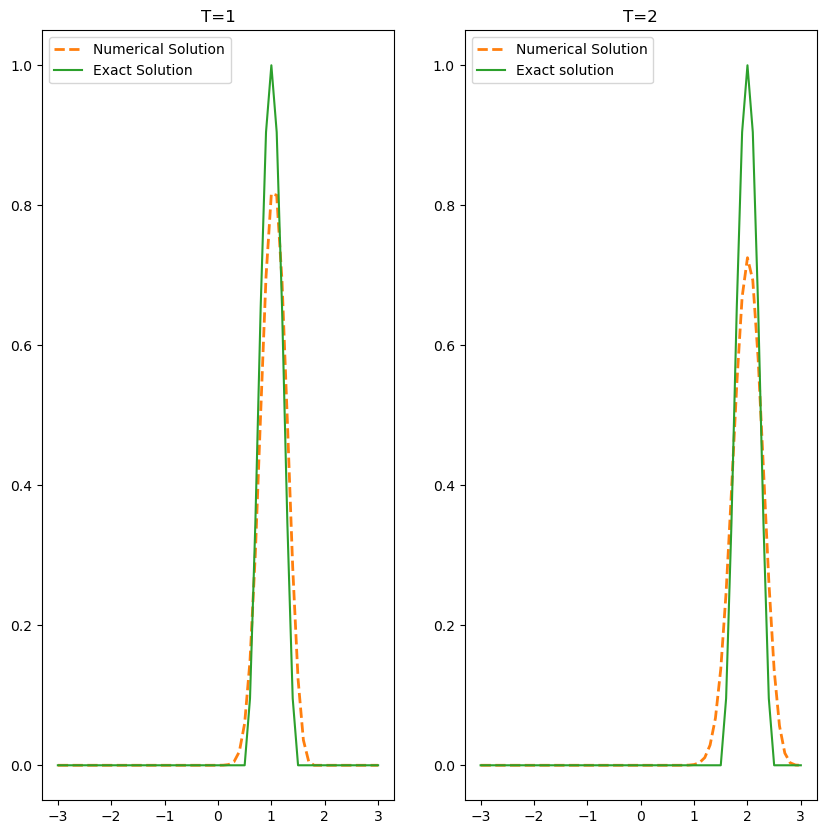

In [11]:
u2, u1, x= FTBS(1/10, 0.8)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

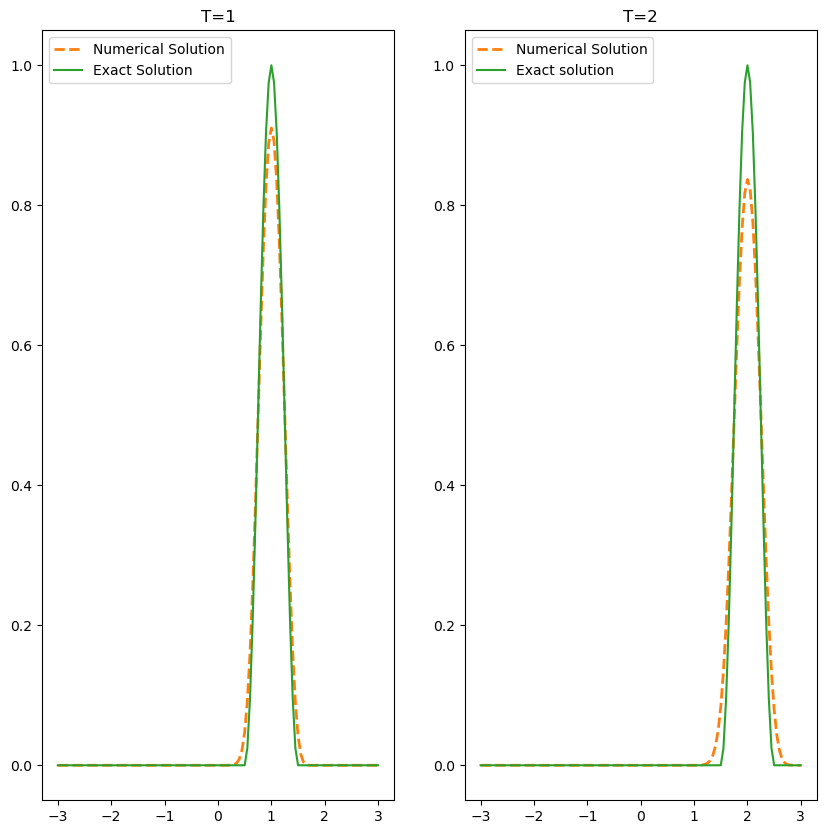

In [12]:
u2, u1, x= FTBS(1/20, 0.8)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

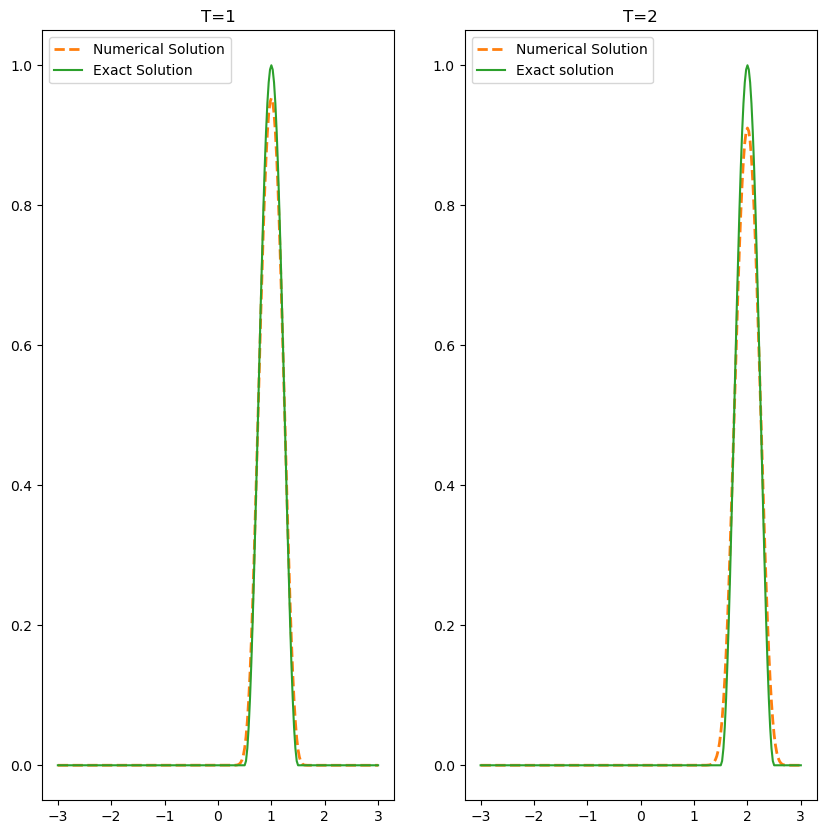

In [13]:
u2, u1, x= FTBS(1/40, 0.8)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

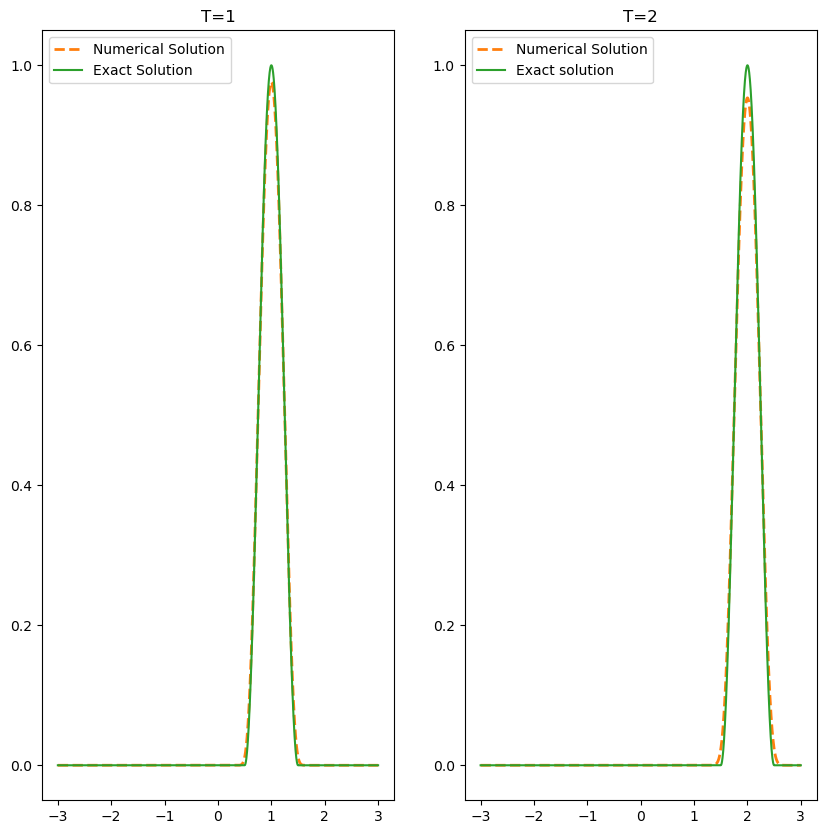

In [14]:
u2, u1, x= FTBS(1/400, 0.01)
plotting(x, u1, u2)

## Forwad-time Central-space

$$ \frac{v_{m}^{n+1} - v_{m}^{n}}{k} + a\frac{v_{m+1}^{n} - v_{m-1}^{n}}{2h} $$
$$v_{m}^{n+1} = v_{m}^{n} + \frac{\lambda}{2}(v_{m-1}^{n} - v_{m+1}^{n})$$

In [15]:
def FTCS(h, lamb):
    u, x, lent = mesh(h, lamb)
    for i in range(0,lent-1):
        u[1:-1, i+1] =  u[1:-1, i] +  (lamb/2) * (u[0:-2, i] - u[2:, i])
        # plt.plot(x, u[:,i])
    return u[:, -1], u[:, int(lent/2)], x

<Figure size 640x480 with 0 Axes>

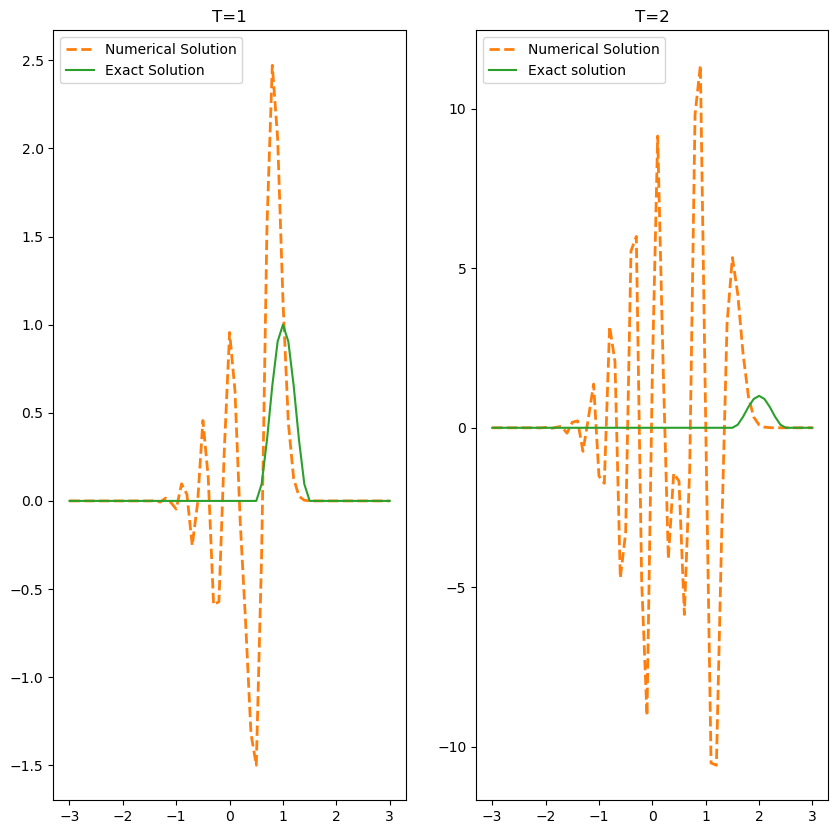

In [16]:
u2, u1, x= FTCS(1/10, 0.8)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

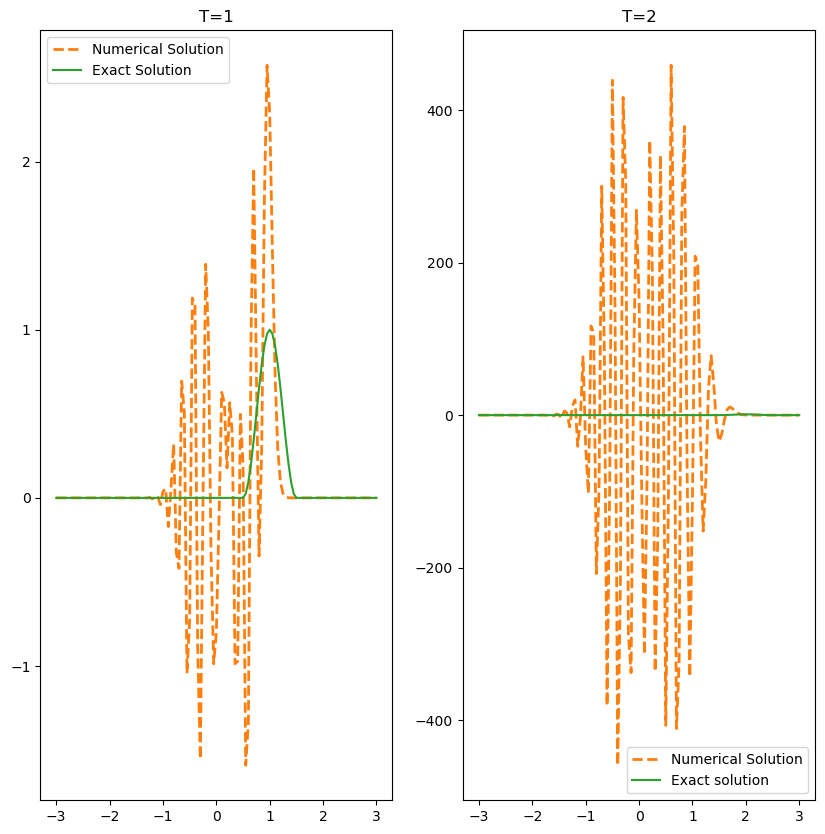

In [17]:
u2, u1, x= FTCS(1/20, 0.8)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

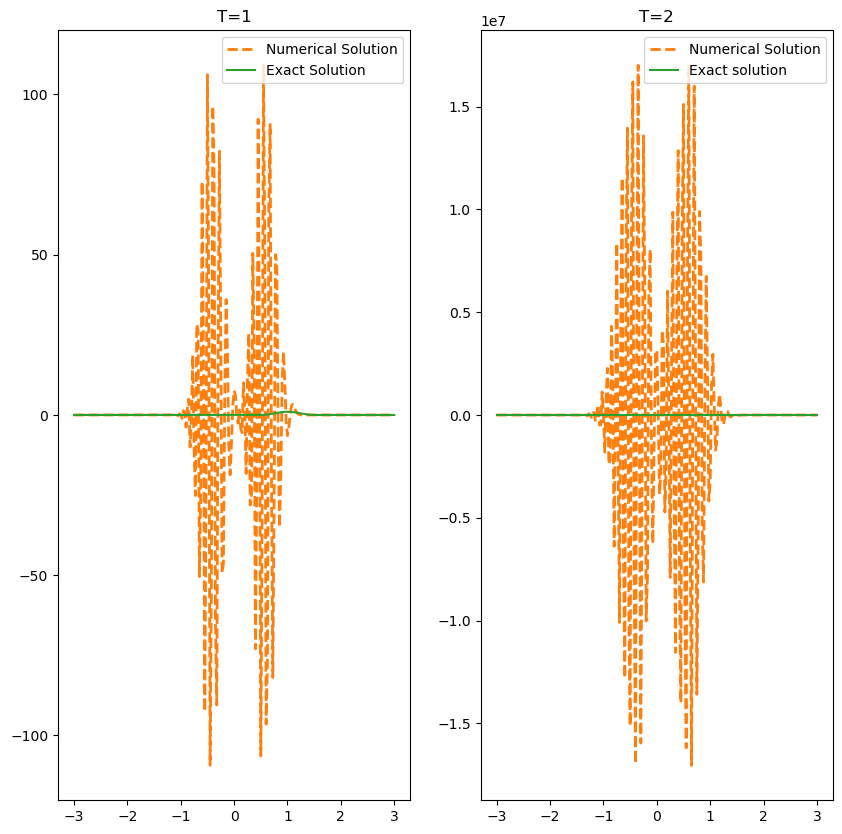

In [18]:
u2, u1, x= FTCS(1/40, 0.8)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

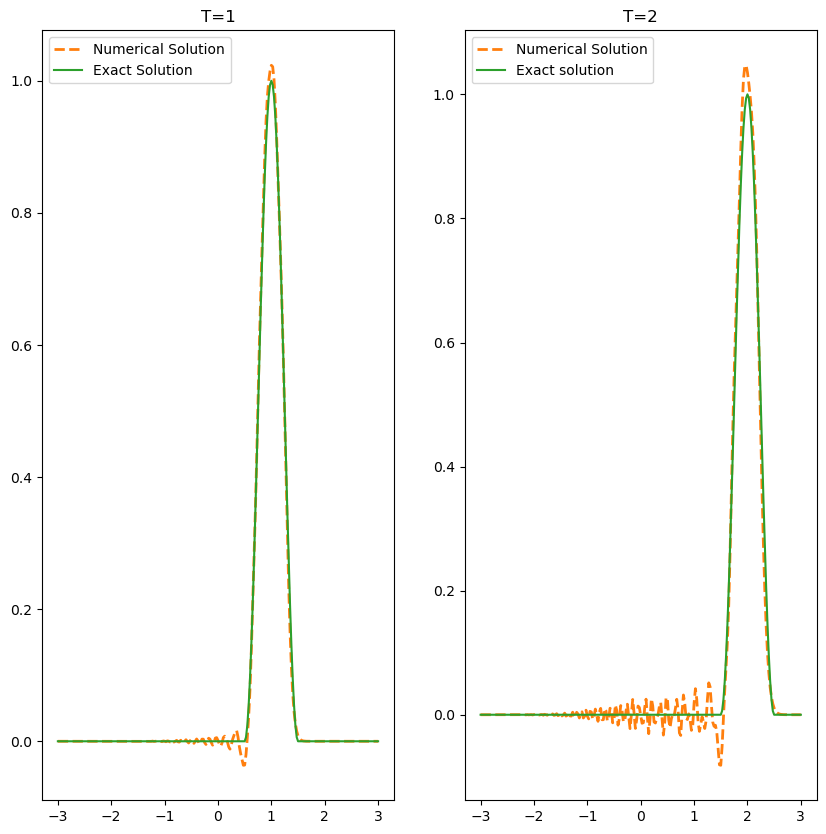

In [19]:
u2, u1, x= FTCS(1/40, 0.1)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

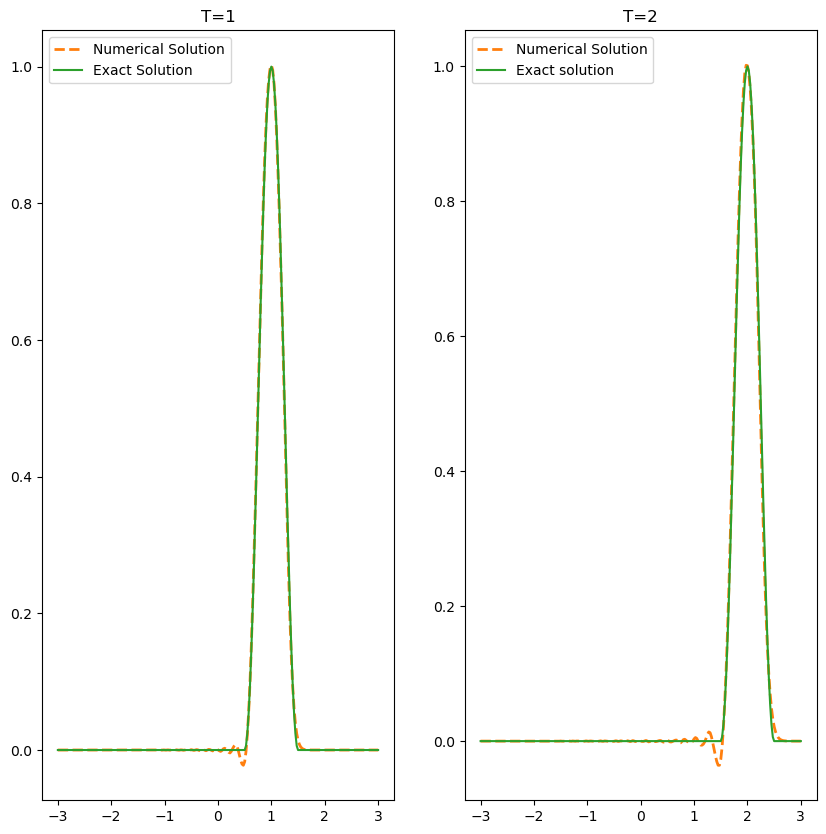

In [20]:
u2, u1, x= FTCS(1/40, 0.01)
plotting(x, u1, u2)

## Lax-Friedrichs

$$ \frac{v_{m}^{n+1} - \frac{1}{2}\left(v_{m+1}^{n}+v_{m-1}^{n}\right)}{k} + a\frac{v_{m+1}^{n} - v_{m-1}^{n}}{2h} $$
$$ v_{m}^{n+1} = \frac{1}{2}(1-\lambda)v_{m+1}^{n} + \frac{1}{2}(1+\lambda)v_{m-1}^{n}$$

In [21]:
def Lax_Fried(h, lamb):
    u, x, lent = mesh(h, lamb)
    for i in range(0,lent-1):
        u[1:len(x)-1, i+1] =  1/2* (1- lamb) * u[2:len(x), i] + (1+lamb)*1/2 * (u[0:len(x)-2, i] )
    return u[:, -1], u[:, int(lent/2)], x    

<Figure size 640x480 with 0 Axes>

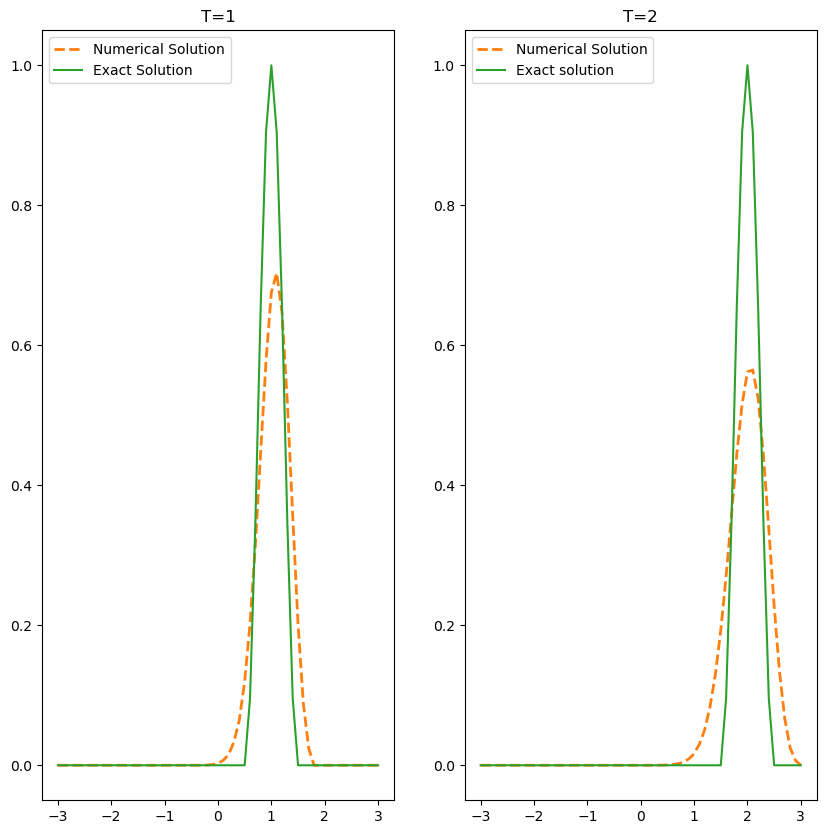

In [22]:
u2, u1, x= Lax_Fried(1/10, 0.8)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

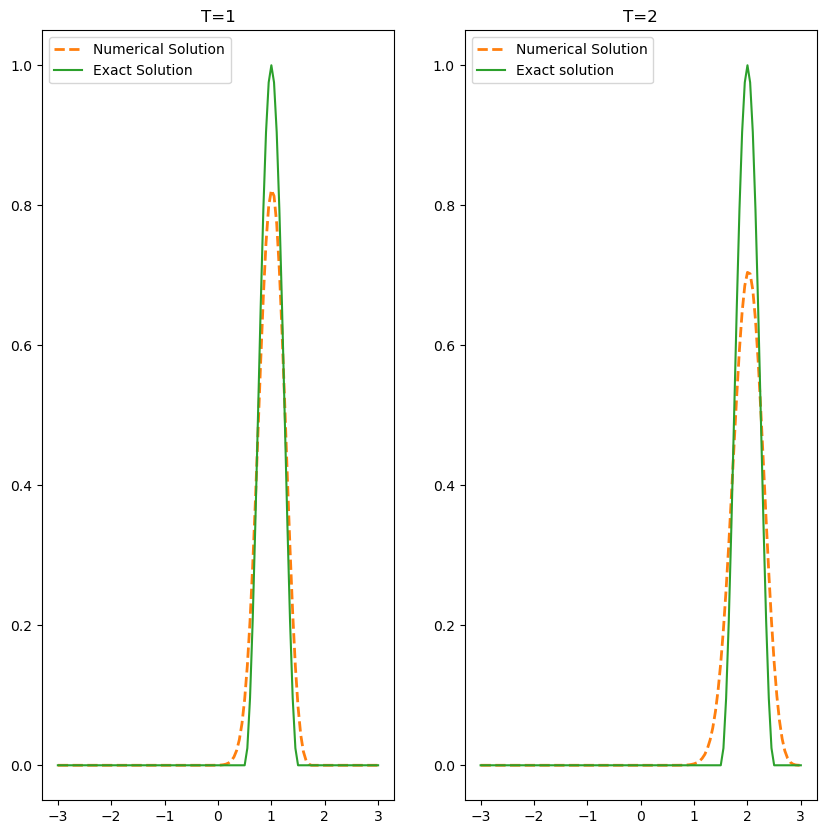

In [23]:
u2, u1, x= Lax_Fried(1/20, 0.8)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

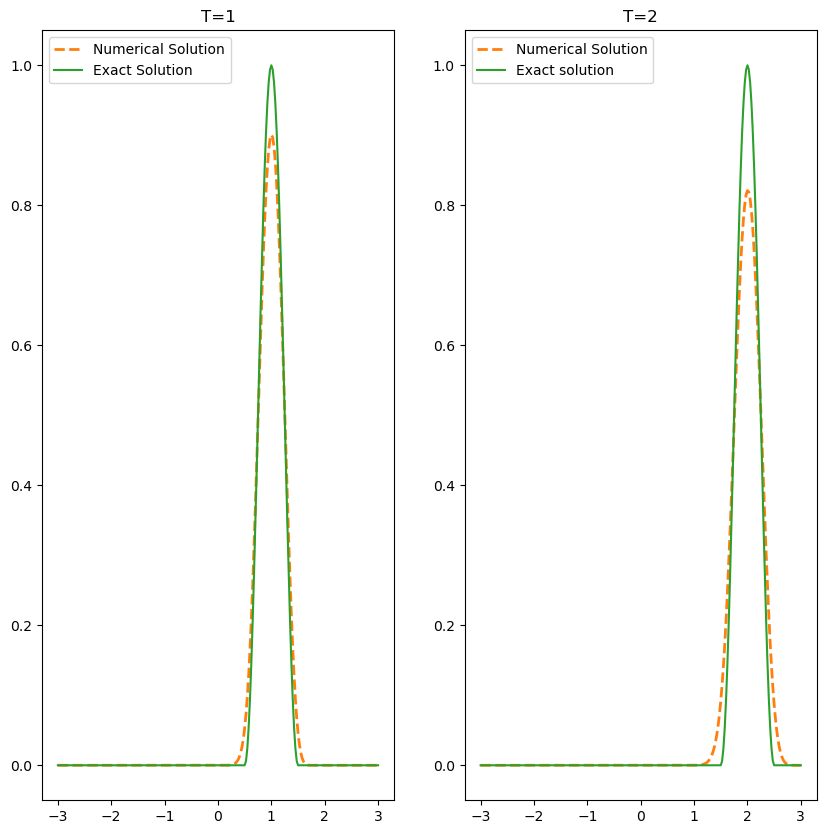

In [24]:
u2, u1, x= Lax_Fried(1/40, 0.8)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

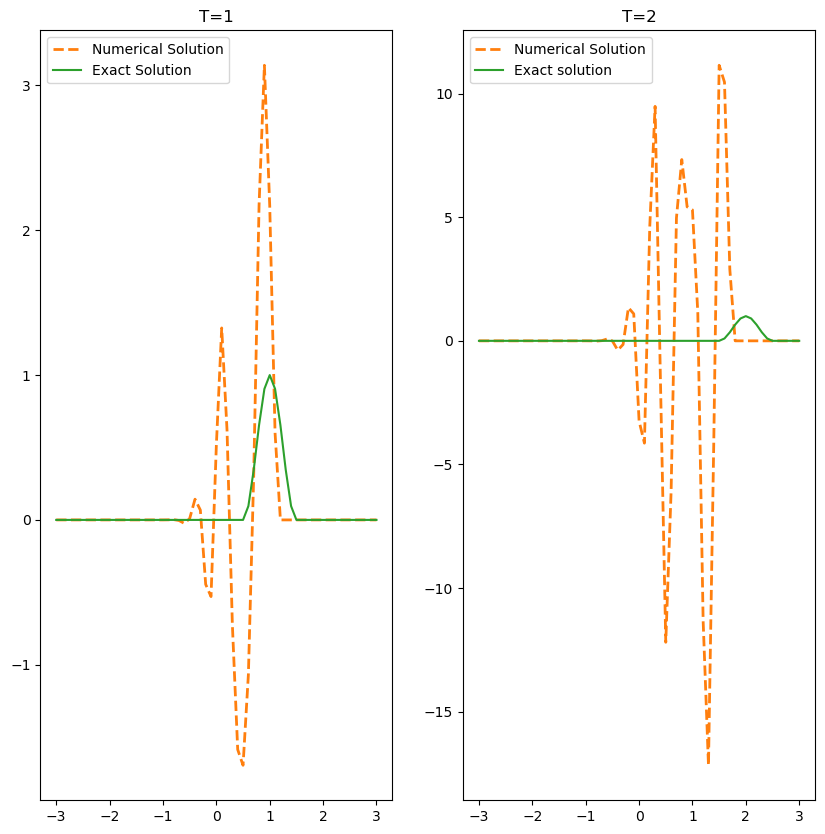

In [25]:
u2, u1, x= Lax_Fried(1/10, 1.6)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

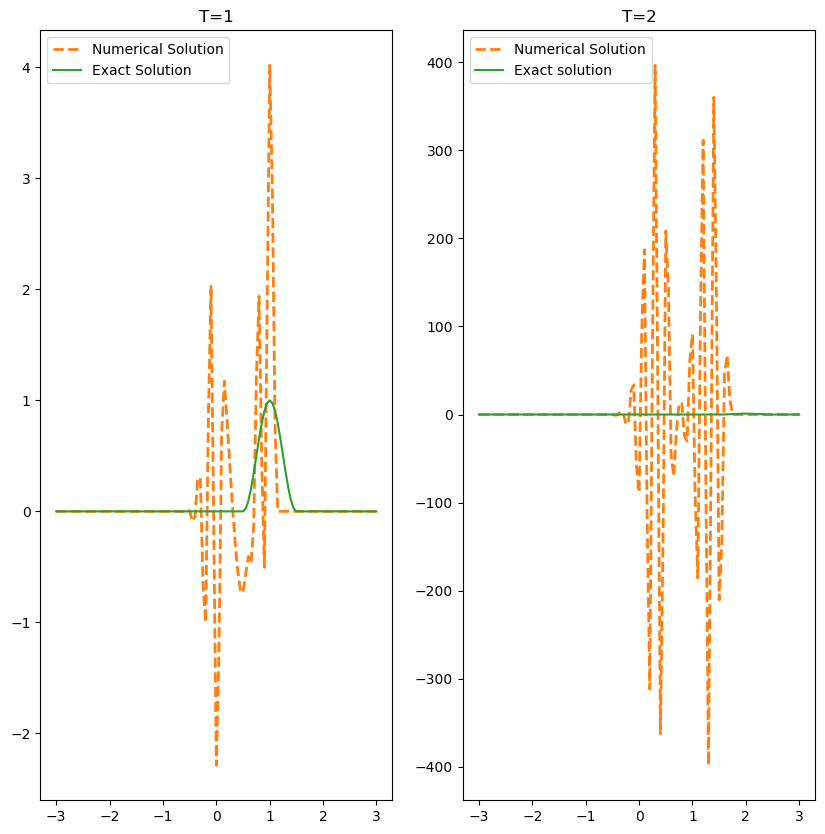

In [26]:
u2, u1, x= Lax_Fried(1/20, 1.6)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

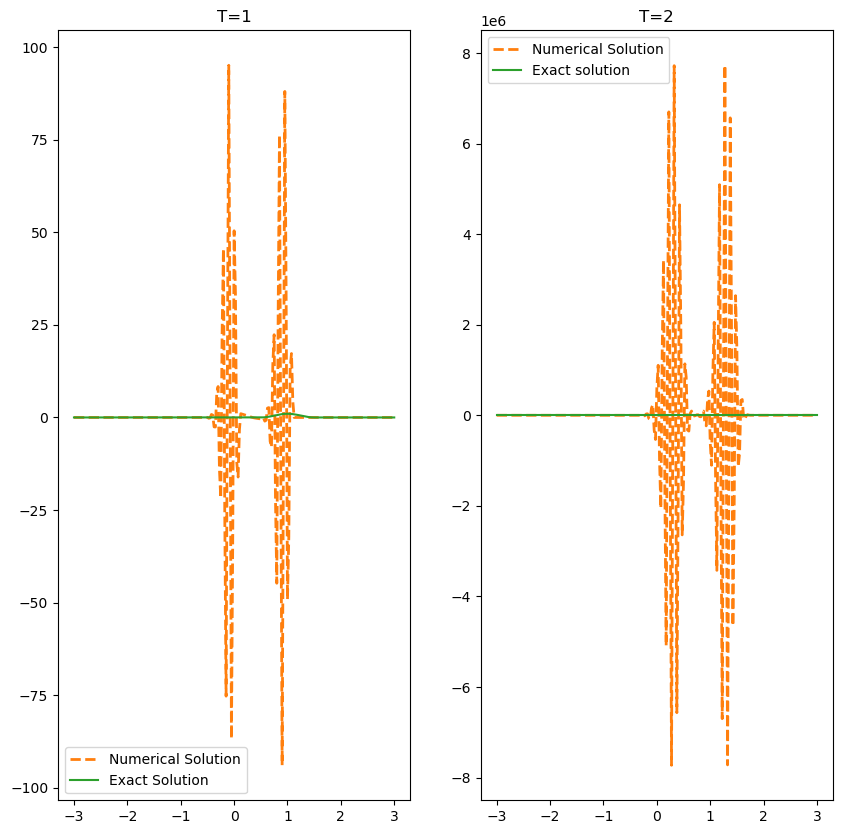

In [27]:
u2, u1, x= Lax_Fried(1/40, 1.6)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

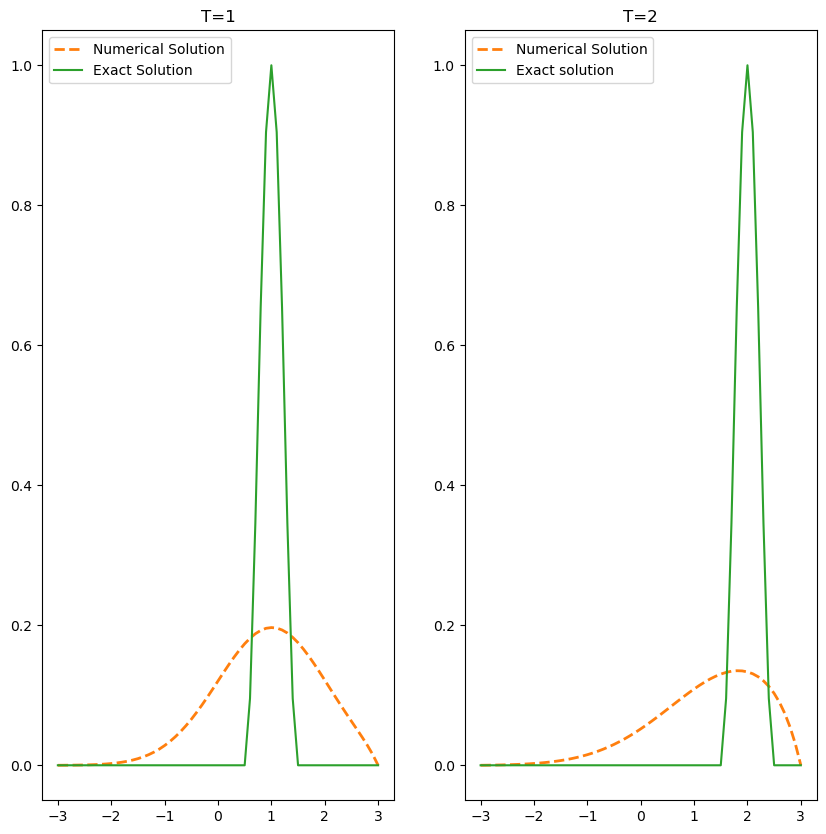

In [28]:
u2, u1, x= Lax_Fried(1/10, 0.1)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

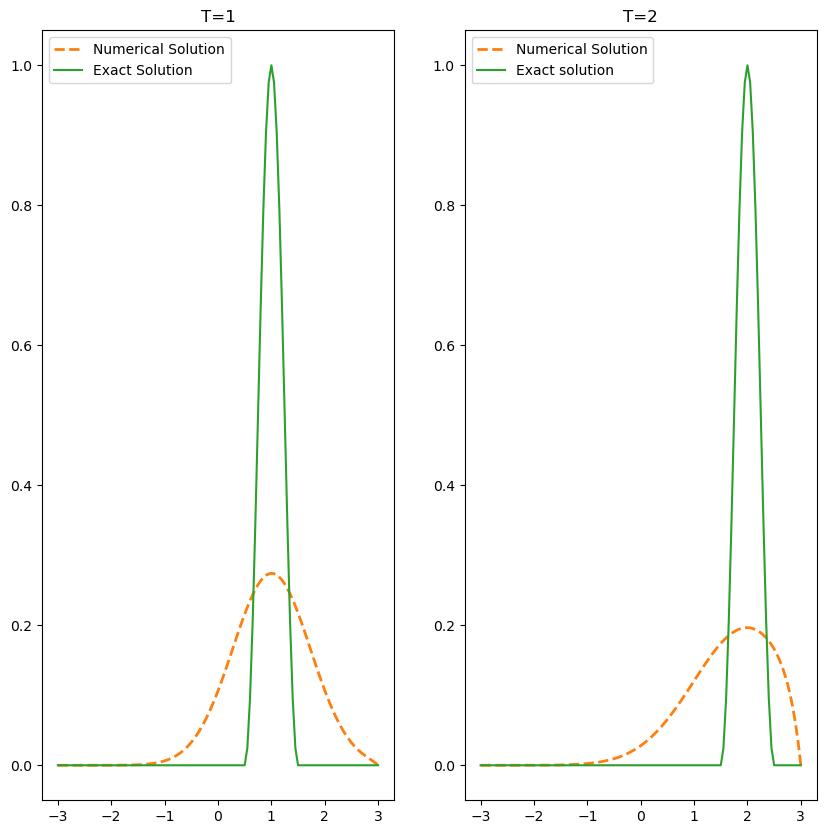

In [29]:
u2, u1, x= Lax_Fried(1/20, 0.1)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

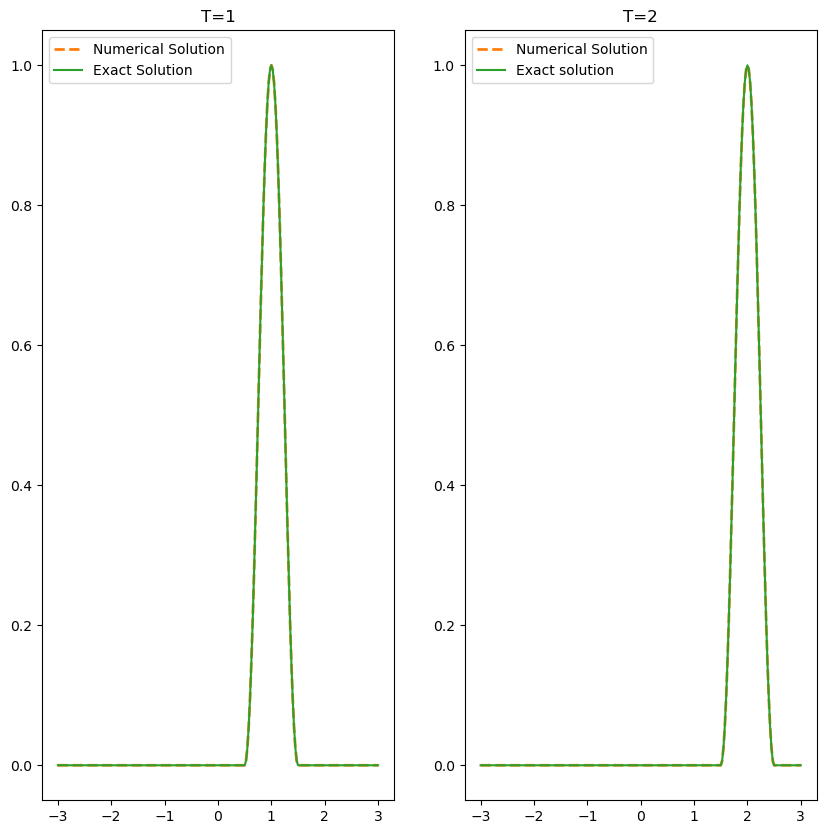

In [30]:
u2, u1, x= Lax_Fried(1/40, 1)
plotting(x, u1, u2)


## Leapfrog
$$ \frac{v_{m}^{n+1} - v_{m}^{n-1}}{2k} + a\frac{v_{m+1}^{n} - v_{m-1}^{n}}{2h} $$
$$ v_{m}^{n+1} = v_{m}^{n-1} -\lambda( v_{m+1}^{n} - v_{m-1}^{n})$$
Only `2-step` in this problem set. So I used first step, Lax - Friedrichs.

In [31]:
def Leapfrog(h, lamb):
    u, x, lent = mesh(h, lamb)
    u[1:len(x)-1, 1] =  1/2* (1- lamb) * u[2:len(x), 0] + (1+lamb)*1/2 * (u[0:len(x)-2, 0] )  ## Lax-Friedrichs
    for i in range(1,lent-1):
        u[1:len(x)-1, i+1] =  u[1:len(x)-1, i-1] - lamb * (u[2:len(x), i] - u[0:len(x)-2, i])
    return u[:, -1], u[:, int(lent/2)], x

<Figure size 640x480 with 0 Axes>

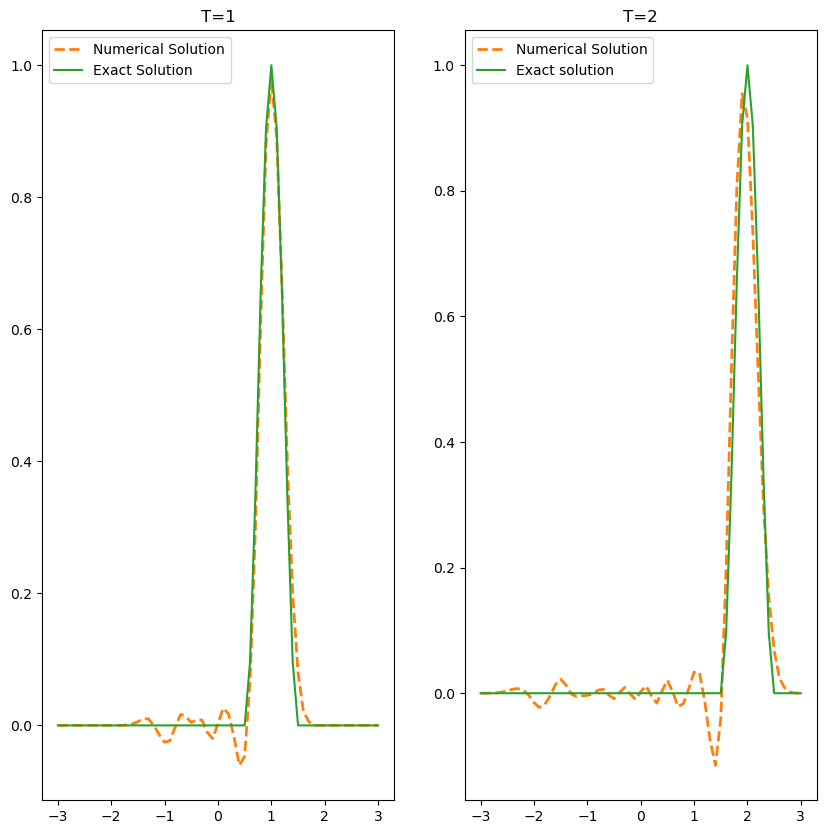

In [32]:
u2, u1, x= Leapfrog(1/10, 0.8)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

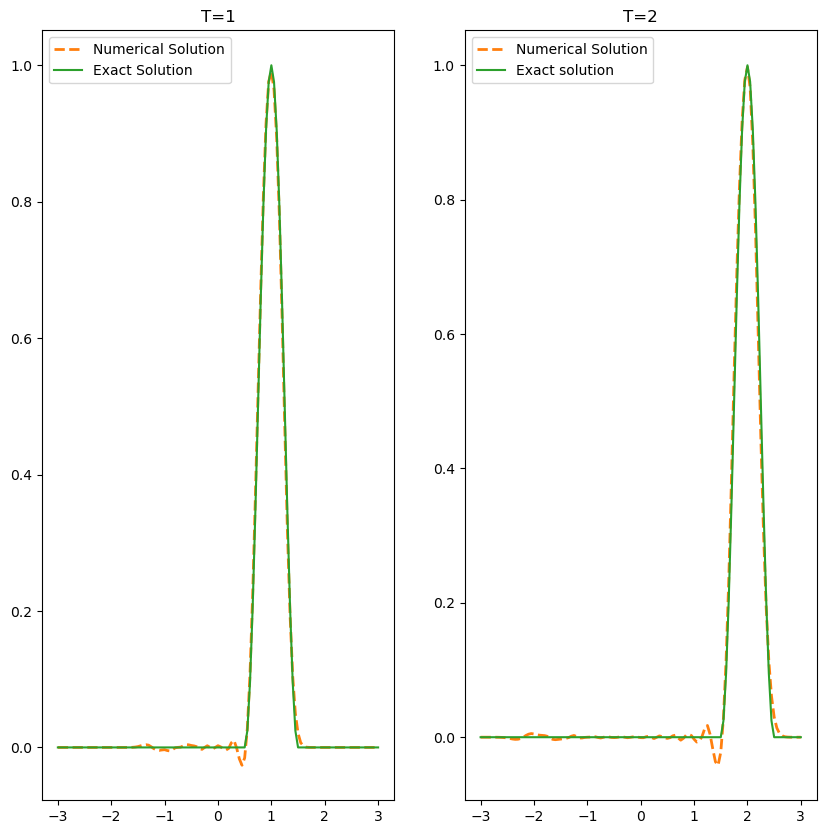

In [33]:
u2, u1, x= Leapfrog(1/20, 0.8)
plotting(x, u1, u2)

<Figure size 640x480 with 0 Axes>

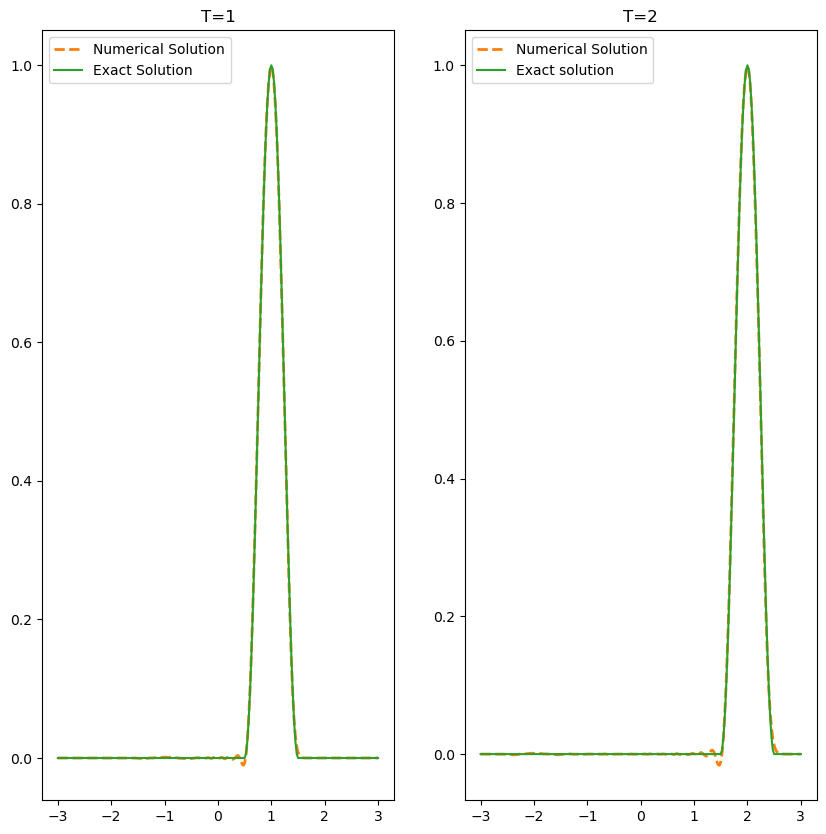

In [34]:
u2, u1, x= Leapfrog(1/40, 0.8)
plotting(x, u1, u2)